In [1]:
%matplotlib inline
from scipy import stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

plt.rcParams['figure.figsize'] = [10, 7]

# Basic plotting
## Help:
[statsmodels plotting methods](http://statsmodels.sourceforge.net/devel/graphics.html#goodness-of-fit-plots)

In [2]:
# Dummy data
data = np.random.rand(10)

## Scatter

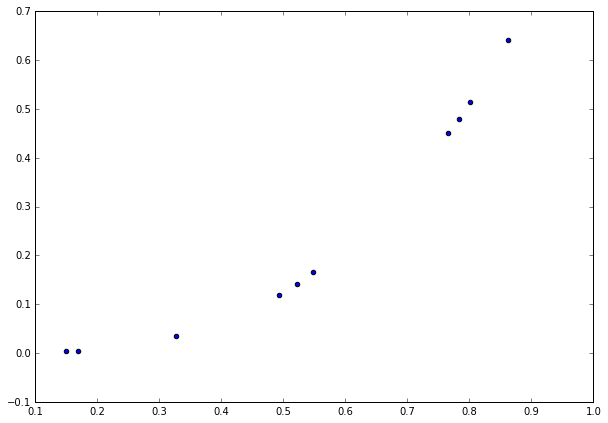

In [3]:
plt.scatter(data, data**3)

## Plot

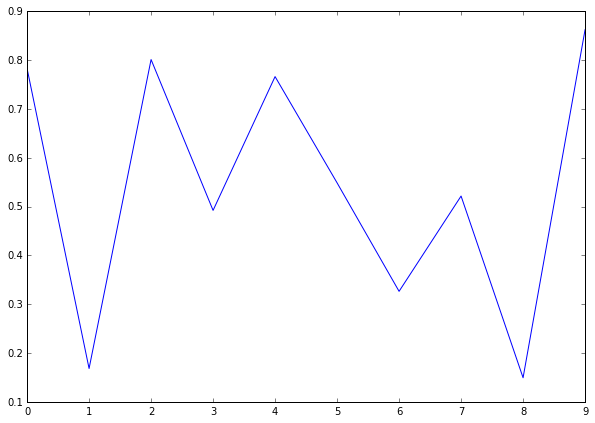

In [4]:
plt.plot(data)

## Histogram

(array([ 2.,  0.,  1.,  0.,  1.,  2.,  0.,  0.,  2.,  2.]),
 array([ 0.149292  ,  0.22057616,  0.29186032,  0.36314448,  0.43442863,
         0.50571279,  0.57699695,  0.64828111,  0.71956527,  0.79084943,
         0.86213359]),
 <a list of 10 Patch objects>)

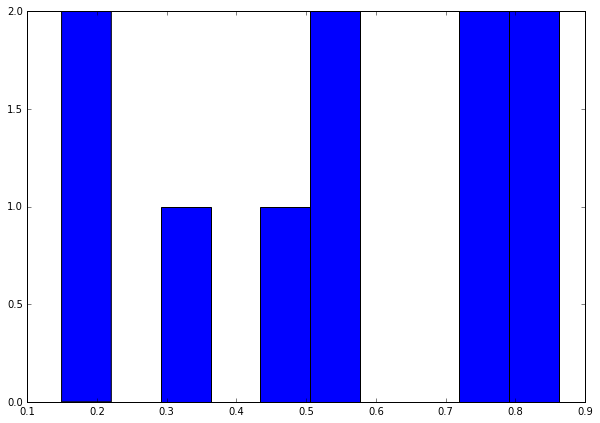

In [5]:
plt.hist(data)

## QQ

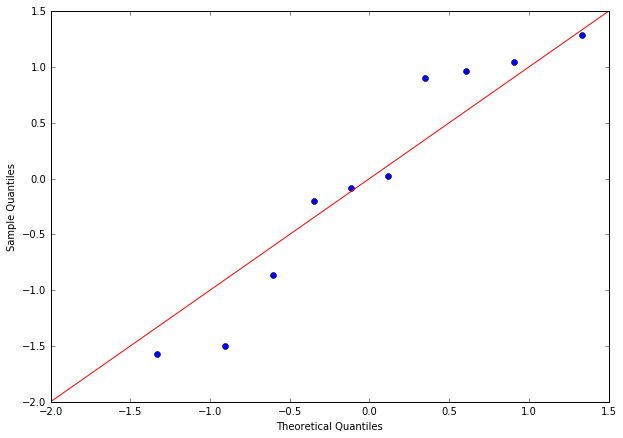

In [7]:
line = '45' # '45' 's' 'q' 'r'
ax = sm.graphics.qqplot(data, dist=stats.t, line=line, fit=True);

## Boxplots

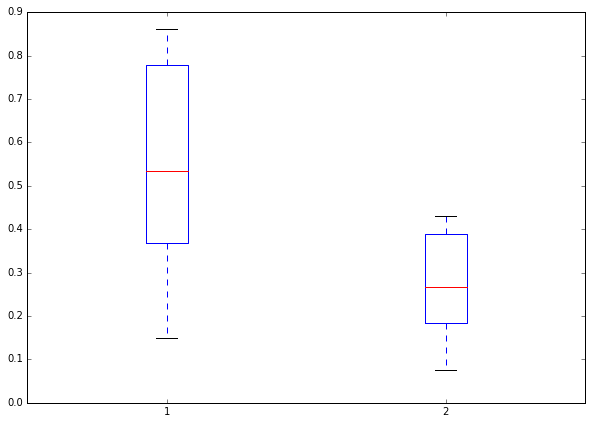

In [8]:
# basic
plt.boxplot([data, data / 2]);

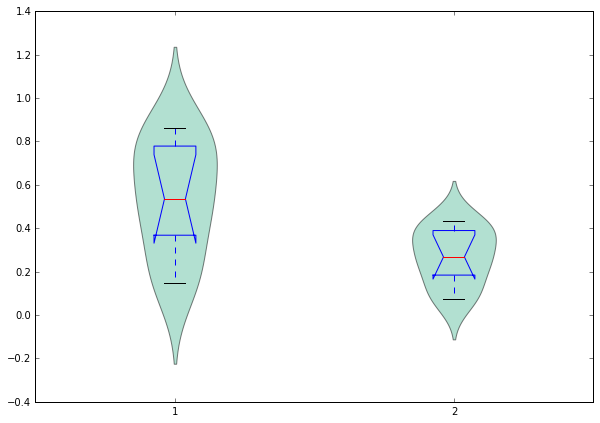

In [12]:
sm.graphics.violinplot([data, data / 2], show_boxplot=True);

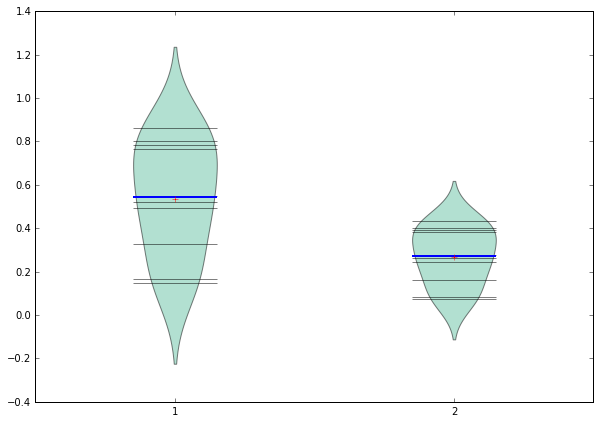

In [13]:
sm.graphics.beanplot([data, data / 2]);

# Correlation plots

## Basic color

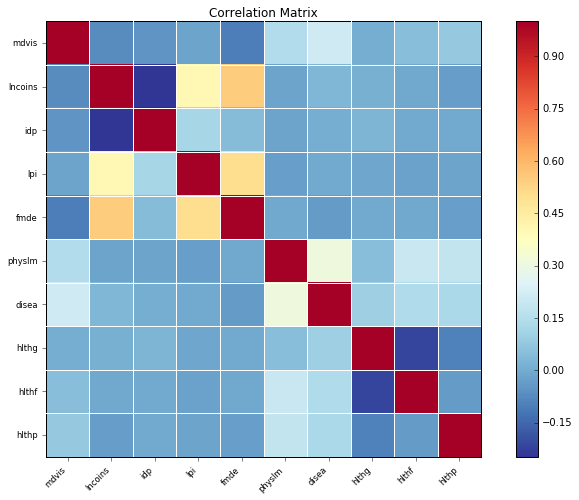

In [14]:
hie_data = sm.datasets.randhie.load_pandas()
corr_matrix = np.corrcoef(hie_data.data.T)
sm.graphics.plot_corr(corr_matrix, xnames=hie_data.names);

## Multi Correlations

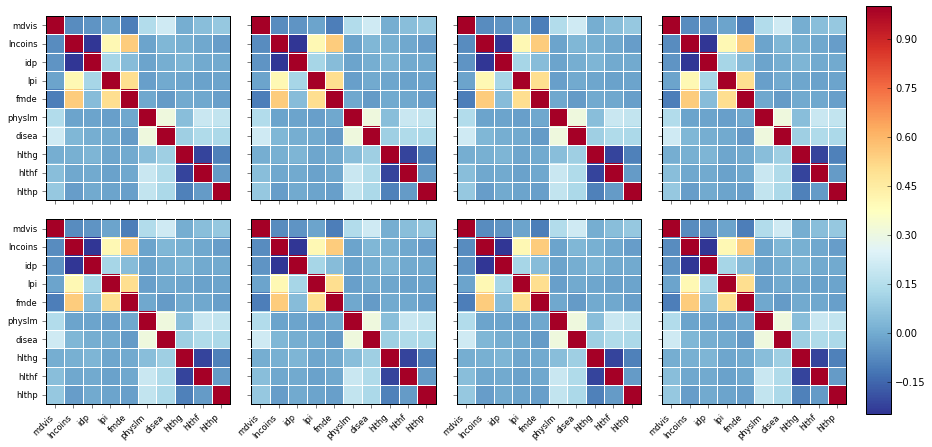

In [15]:
sm.graphics.plot_corr_grid([corr_matrix] * 8, xnames=hie_data.names);

# Regression Plots

## Regression line over residuals

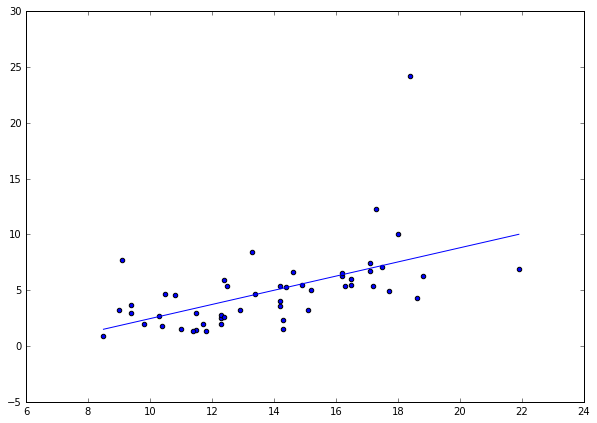

In [16]:
data = sm.datasets.statecrime.load_pandas().data
y = data['murder'].values
X = data['poverty'].values

# plot X, Ys
plt.scatter(X, y)

# fit the regression
reg = sm.OLS(y, sm.add_constant(X)).fit()

X_plot = np.linspace(X.min(), X.max(), len(X))
y_plot = reg.predict(sm.add_constant(X_plot))

plt.plot(X_plot, y_plot)

## Plot CCPR against one regressor.

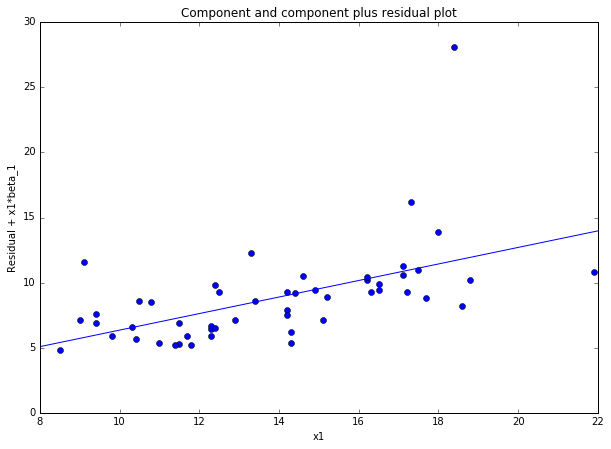

In [17]:
sm.graphics.plot_ccpr(reg, exog_idx=1);

## Plot fit against one regressor.

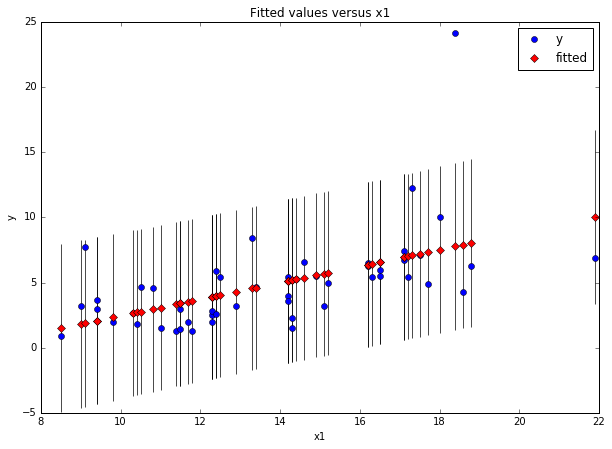

In [18]:
# exog_idx is the index of the column. Because we have add_constant it is 1
sm.graphics.plot_fit(reg, exog_idx=1);

## Plot regression results against one regressor

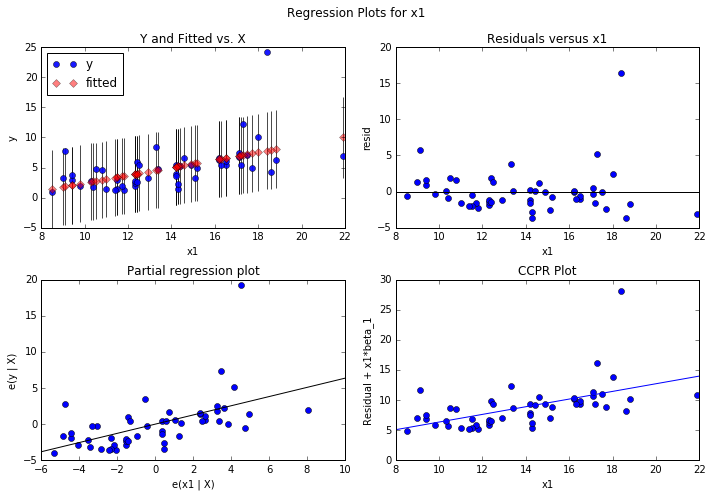

In [19]:
sm.graphics.plot_regress_exog(reg, exog_idx=1);

## Plot of influence in regression. Plots studentized resids vs. leverage.

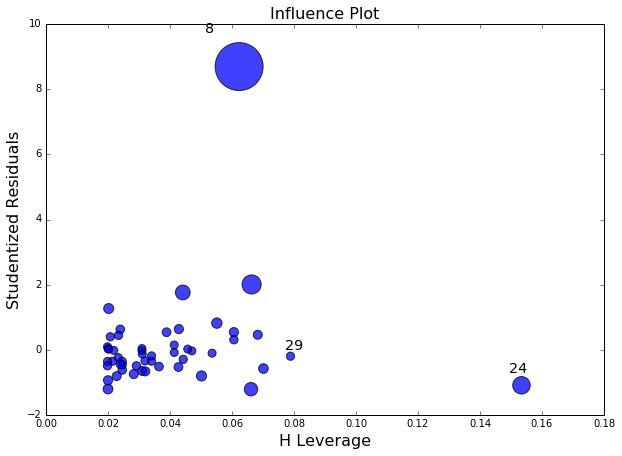

In [100]:
sm.graphics.influence_plot(reg);

## Plots leverage statistics vs. normalized residuals squared

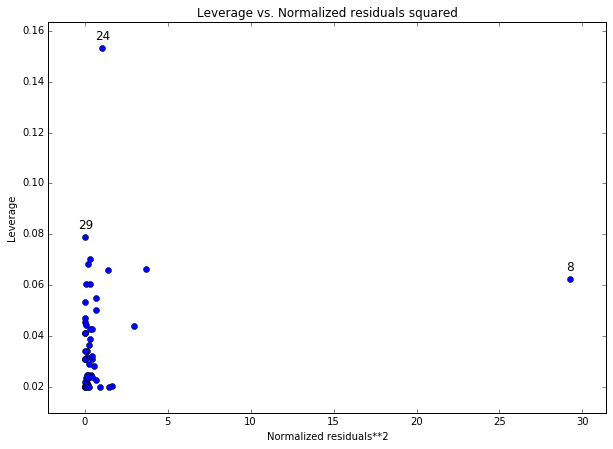

In [101]:
sm.graphics.plot_leverage_resid2(reg);

# Subplots

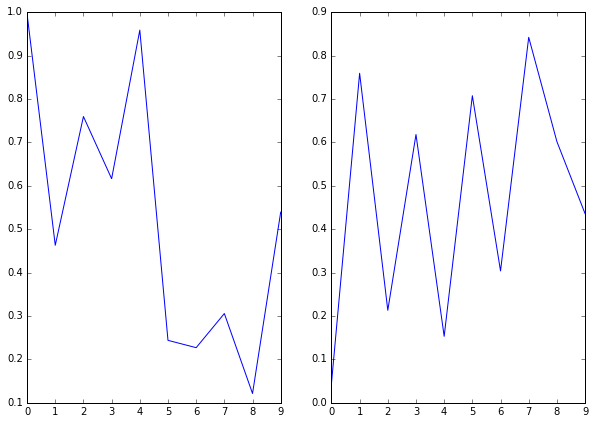

In [103]:
f, ax = plt.subplots(nrows=1, ncols=2)
x1 = np.random.rand(10)
x2 = np.random.rand(10)
ax[0].plot(x1)
ax[1].plot(x2)

## Subplots with statsmodels

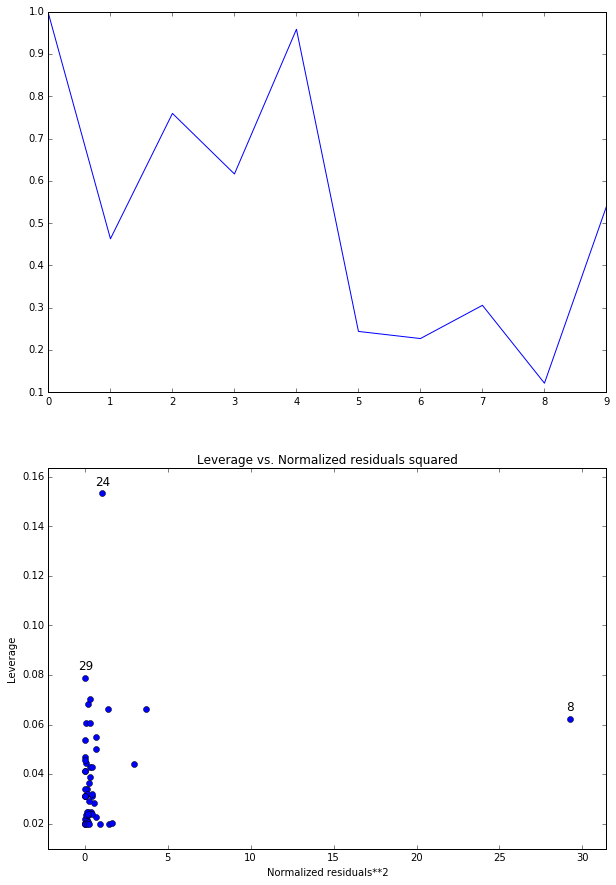

In [112]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=[10, 15])
ax[0].plot(x1)
sm.graphics.plot_leverage_resid2(reg, ax=ax[1]);